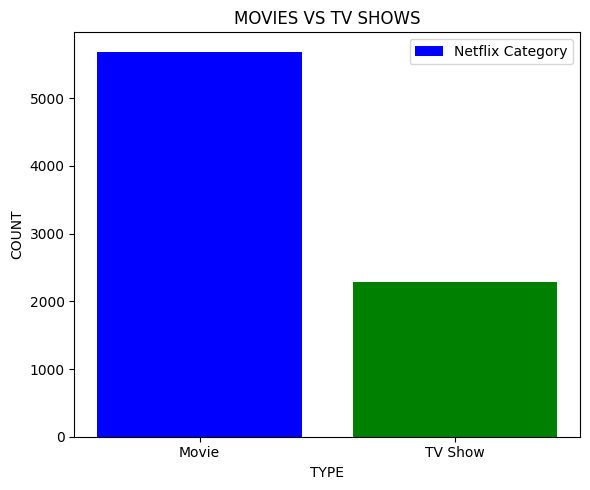

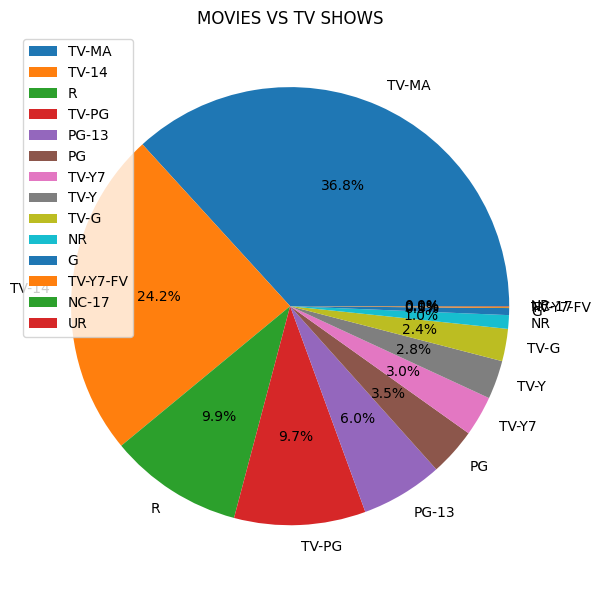

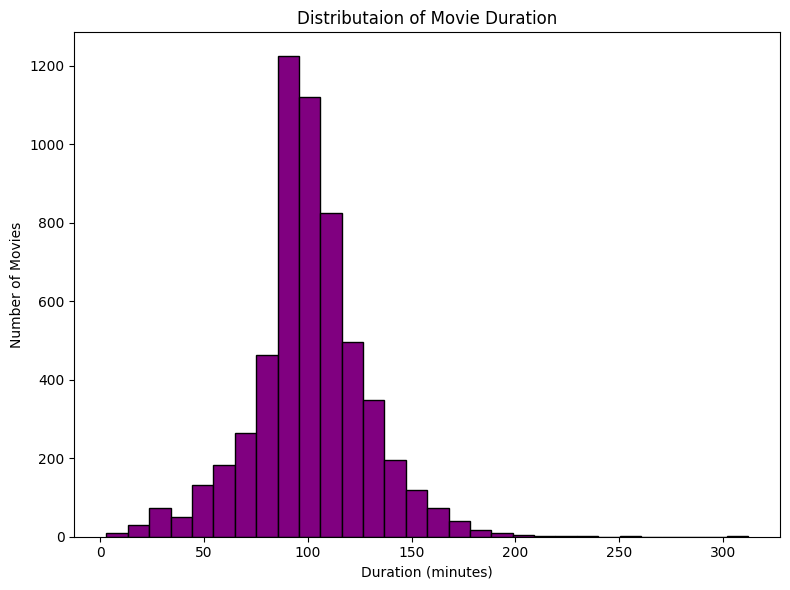

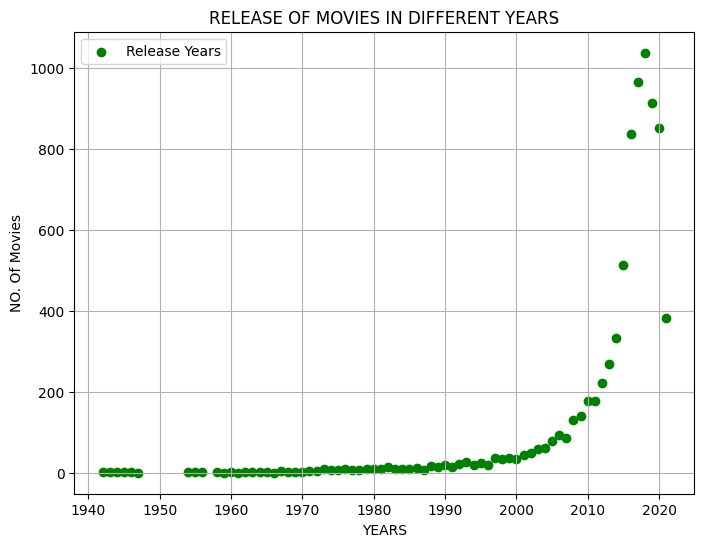

country
United States     2815
India              972
United Kingdom     419
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


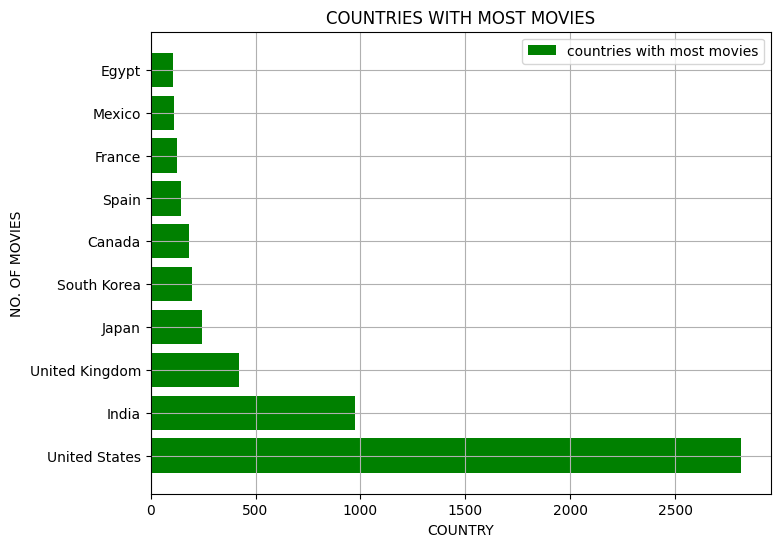

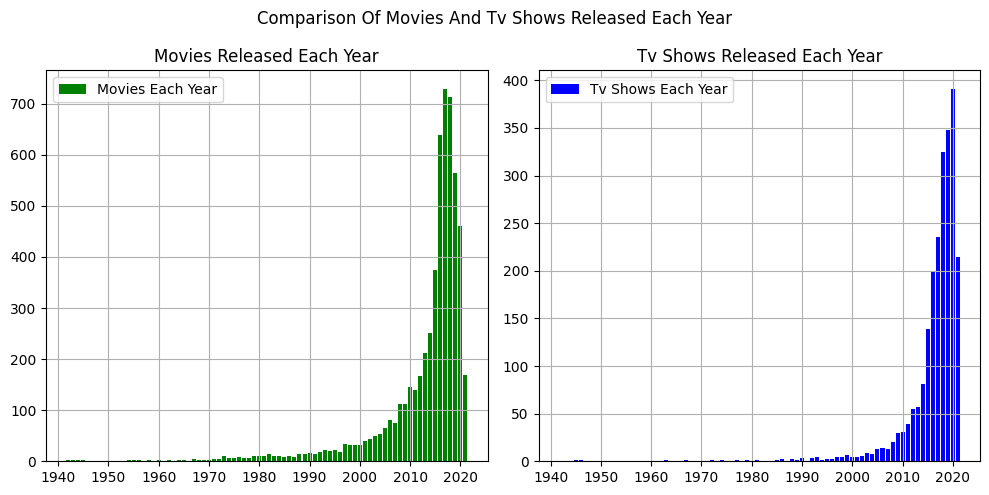

In [13]:
#import the require libraries
import matplotlib.pyplot as plt
import pandas as pd

#load the data
df = pd.read_csv("netflix_titles.csv")


#clean data
df= df.dropna(subset=['type','release_year','country','rating','duration'])  #need to clean this rows bcz we want to visualize only this rows

#type of category(bar graph)
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,5))
plt.bar(type_counts.index, type_counts.values, color=['blue', 'green'], label='Netflix Category')
plt.legend()
plt.title('MOVIES VS TV SHOWS')
plt.xlabel("TYPE")
plt.ylabel("COUNT")
plt.tight_layout()
plt.show()

#rating (pie chart)
rate_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rate_counts.values, labels=rate_counts.index, autopct='%1.1f%%')
plt.legend()
plt.title('MOVIES VS TV SHOWS')
plt.tight_layout()
plt.show()

#duration distribution of only movies (histogram)
movie_df = df[df['type'] == 'Movie'].copy()  #made new dataframe which only contain movie not TV shows in type column
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distributaion of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

#release years(scatter plot)
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_counts.index, release_counts.values, color='green', marker='o', label='Release Years')
plt.title('RELEASE OF MOVIES IN DIFFERENT YEARS')
plt.legend()
plt.xlabel('YEARS')
plt.ylabel("NO. Of Movies")
plt.grid()
plt.show()

#country counts (horizontal bar graph)
country_counts = df['country'].value_counts().head(10)
print(country_counts)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='green', label='countries with most movies')
plt.title('COUNTRIES WITH MOST MOVIES')
plt.legend()
plt.grid()
plt.xlabel('COUNTRY')
plt.ylabel('NO. OF MOVIES')
plt.show()

#subplot between movies and Tv show realse each year  (bar graph)
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2,figsize=(10,5))
#movies per year(bar graph)
ax[0].bar(content_by_year.index, content_by_year['Movie'], color='green', label='Movies Each Year')
ax[0].set_title("Movies Released Each Year")
ax[0].legend()
ax[0].grid()
#TV shows per year(bar graph)
ax[1].bar(content_by_year.index, content_by_year['TV Show'], color='blue', label='Tv Shows Each Year')
ax[1].set_title("Tv Shows Released Each Year")
ax[1].legend()
ax[1].grid()

fig.suptitle("Comparison Of Movies And Tv Shows Released Each Year")
plt.tight_layout()
plt.show()

